<a href="https://colab.research.google.com/github/shradulanand/Employee-Attrition-Model-/blob/main/shradulanand_ml_project_attrition_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING IMPORTANT LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb


LOADING THE DATASET

In [3]:
df = pd.read_csv('Employee-turnover.csv')
df

,Employee Count,Employee ID,Department,Job Role,Gender,Age,Marital Status,Education,Education Field,Business Travel,...,Total Working Years,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager,Environment Satisfaction,Training Times Last Year,Work Life Balance,Relationship Satisfaction,Attrition (Yes/No)
0,1,1,Sales,Sales Executive,Female,41,Single,College,Life Sciences,Travel_Rarely,...,8,6,4,0,5,Medium,0,Bad,Low,Yes
1,1,2,Research & Development,Research Scientist,Male,49,Married,Below College,Life Sciences,Travel_Frequently,...,10,10,7,1,7,High,3,Better,Very High,No
2,1,4,Research & Development,Laboratory Technician,Male,37,Single,College,Other,Travel_Rarely,...,7,0,0,0,0,Low,3,Bad,Medium,Yes
3,1,5,Research & Development,Research Scientist,Female,33,Married,Master,Life Sciences,Travel_Frequently,...,8,8,7,3,0,Very High,3,Better,High,No
4,1,7,Research & Development,Laboratory Technician,Male,27,Married,Below College,Medical,Travel_Rarely,...,6,2,2,2,2,Low,3,Better,Very High,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1,2061,Research & Development,Laboratory Technician,Male,36,Married,College,Medical,Travel_Frequently,...,17,5,2,0,3,High,3,Better,High,No
1466,1,2062,Research & Development,Healthcare Representative,Male,39,Married,Below College,Medical,Travel_Rarely,...,9,7,7,1,7,Very High,5,Better,Low,No
1467,1,2064,Research & Development,Manufacturing Director,Male,27,Married,Bachelor,Life Sciences,Travel_Rarely,...,6,6,2,0,3,Medium,0,Better,Medium,No
1468,1,2065,Sales,Sales Executive,Male,49,Married,Bachelor,Medical,Travel_Frequently,...,17,9,6,0,8,Very High,3,Good,Very High,No


In [4]:
df.shape #number of columns and rows in dataset

(1470, 29)

EXPLORING THE DATASET

In [5]:
df.describe()

,Employee Count,Employee ID,Age,Distance From Home (kms),Job Level,Monthly Income (USD),Salary Hike (%),Stock Option Level,No. of Companies Worked,Total Working Years,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager,Training Times Last Year
count,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,1.0,1024.865306,36.923810,9.192517,2.063946,6502.931293,14.951701,0.793878,2.689116,11.279592,7.008163,4.229252,2.187755,4.123129,2.799320
std,0.0,602.024335,9.135373,8.106864,1.106940,4707.956783,3.533904,0.852077,2.494231,7.780782,6.126525,3.623137,3.222430,3.568136,1.289271
min,1.0,1.000000,18.000000,1.000000,1.000000,1009.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,491.250000,30.000000,2.000000,1.000000,2911.000000,12.000000,0.000000,1.000000,6.000000,3.000000,2.000000,0.000000,2.000000,2.000000
50%,1.0,1020.500000,36.000000,7.000000,2.000000,4919.000000,14.000000,1.000000,2.000000,10.000000,5.000000,3.000000,1.000000,3.000000,3.000000
75%,1.0,1555.750000,43.000000,14.000000,3.000000,8379.000000,17.000000,1.000000,4.000000,15.000000,9.000000,7.000000,3.000000,7.000000,3.000000
max,1.0,2068.000000,60.000000,29.000000,5.000000,19999.000000,25.000000,3.000000,9.000000,40.000000,40.000000,18.000000,15.000000,17.000000,6.000000


In [6]:
df.head()

,Employee Count,Employee ID,Department,Job Role,Gender,Age,Marital Status,Education,Education Field,Business Travel,...,Total Working Years,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager,Environment Satisfaction,Training Times Last Year,Work Life Balance,Relationship Satisfaction,Attrition (Yes/No)
0,1,1,Sales,Sales Executive,Female,41,Single,College,Life Sciences,Travel_Rarely,...,8,6,4,0,5,Medium,0,Bad,Low,Yes
1,1,2,Research & Development,Research Scientist,Male,49,Married,Below College,Life Sciences,Travel_Frequently,...,10,10,7,1,7,High,3,Better,Very High,No
2,1,4,Research & Development,Laboratory Technician,Male,37,Single,College,Other,Travel_Rarely,...,7,0,0,0,0,Low,3,Bad,Medium,Yes
3,1,5,Research & Development,Research Scientist,Female,33,Married,Master,Life Sciences,Travel_Frequently,...,8,8,7,3,0,Very High,3,Better,High,No
4,1,7,Research & Development,Laboratory Technician,Male,27,Married,Below College,Medical,Travel_Rarely,...,6,2,2,2,2,Low,3,Better,Very High,No


In [7]:
df.columns.values

array(['Employee Count', 'Employee ID', 'Department', 'Job Role',
       'Gender', 'Age', 'Marital Status', 'Education', 'Education Field',
       'Business Travel', 'Distance From Home (kms)', 'Job Involvement',
       'Job Level', 'Job Satisfaction', 'Monthly Income (USD)',
       'Salary Hike (%)', 'Stock Option Level', 'Over Time',
       'No. of Companies Worked', 'Total Working Years',
       'Years At Company', 'Years In Current Role',
       'Years Since Last Promotion', 'Years With Curr Manager',
       'Environment Satisfaction', 'Training Times Last Year',
       'Work Life Balance', 'Relationship Satisfaction',
       'Attrition (Yes/No)'], dtype=object)

In [8]:
df.isnull().sum() #To check if there are any null values in columns

Employee Count                0
Employee ID                   0
Department                    0
Job Role                      0
Gender                        0
Age                           0
Marital Status                0
Education                     0
Education Field               0
Business Travel               0
Distance From Home (kms)      0
Job Involvement               0
Job Level                     0
Job Satisfaction              0
Monthly Income (USD)          0
Salary Hike (%)               0
Stock Option Level            0
Over Time                     0
No. of Companies Worked       0
Total Working Years           0
Years At Company              0
Years In Current Role         0
Years Since Last Promotion    0
Years With Curr Manager       0
Environment Satisfaction      0
Training Times Last Year      0
Work Life Balance             0
Relationship Satisfaction     0
Attrition (Yes/No)            0
dtype: int64

In [9]:
df.nunique().sort_values() #number of unique values in each column

Employee Count                   1
Over Time                        2
Gender                           2
Attrition (Yes/No)               2
Department                       3
Marital Status                   3
Business Travel                  3
Work Life Balance                4
Environment Satisfaction         4
Relationship Satisfaction        4
Job Satisfaction                 4
Stock Option Level               4
Job Involvement                  4
Job Level                        5
Education                        5
Education Field                  6
Training Times Last Year         7
Job Role                         9
No. of Companies Worked         10
Salary Hike (%)                 16
Years Since Last Promotion      16
Years With Curr Manager         18
Years In Current Role           19
Distance From Home (kms)        29
Years At Company                37
Total Working Years             40
Age                             43
Monthly Income (USD)          1349
Employee ID         

In [10]:
attrition_count = df['Attrition (Yes/No)'].value_counts() #To count number of yes or no in the dataset
attrition_count

No     1233
Yes     237
Name: Attrition (Yes/No), dtype: int64

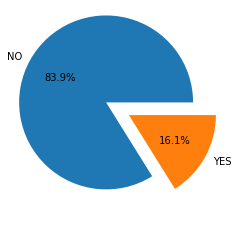

In [11]:
plt.pie(attrition_count, labels = ['NO', 'YES'], explode = (0.3,0), autopct='%1.1f%%')
plt.show()

In [12]:
df = df.drop(['Employee Count'], axis=1)
df

,Employee ID,Department,Job Role,Gender,Age,Marital Status,Education,Education Field,Business Travel,Distance From Home (kms),...,Total Working Years,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager,Environment Satisfaction,Training Times Last Year,Work Life Balance,Relationship Satisfaction,Attrition (Yes/No)
0,1,Sales,Sales Executive,Female,41,Single,College,Life Sciences,Travel_Rarely,1,...,8,6,4,0,5,Medium,0,Bad,Low,Yes
1,2,Research & Development,Research Scientist,Male,49,Married,Below College,Life Sciences,Travel_Frequently,8,...,10,10,7,1,7,High,3,Better,Very High,No
2,4,Research & Development,Laboratory Technician,Male,37,Single,College,Other,Travel_Rarely,2,...,7,0,0,0,0,Low,3,Bad,Medium,Yes
3,5,Research & Development,Research Scientist,Female,33,Married,Master,Life Sciences,Travel_Frequently,3,...,8,8,7,3,0,Very High,3,Better,High,No
4,7,Research & Development,Laboratory Technician,Male,27,Married,Below College,Medical,Travel_Rarely,2,...,6,2,2,2,2,Low,3,Better,Very High,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,2061,Research & Development,Laboratory Technician,Male,36,Married,College,Medical,Travel_Frequently,23,...,17,5,2,0,3,High,3,Better,High,No
1466,2062,Research & Development,Healthcare Representative,Male,39,Married,Below College,Medical,Travel_Rarely,6,...,9,7,7,1,7,Very High,5,Better,Low,No
1467,2064,Research & Development,Manufacturing Director,Male,27,Married,Bachelor,Life Sciences,Travel_Rarely,4,...,6,6,2,0,3,Medium,0,Better,Medium,No
1468,2065,Sales,Sales Executive,Male,49,Married,Bachelor,Medical,Travel_Frequently,2,...,17,9,6,0,8,Very High,3,Good,Very High,No


In [13]:
print(df.dtypes) #To get datatype of each column

Employee ID                    int64
Department                    object
Job Role                      object
Gender                        object
Age                            int64
Marital Status                object
Education                     object
Education Field               object
Business Travel               object
Distance From Home (kms)       int64
Job Involvement               object
Job Level                      int64
Job Satisfaction              object
Monthly Income (USD)           int64
Salary Hike (%)                int64
Stock Option Level             int64
Over Time                     object
No. of Companies Worked        int64
Total Working Years            int64
Years At Company               int64
Years In Current Role          int64
Years Since Last Promotion     int64
Years With Curr Manager        int64
Environment Satisfaction      object
Training Times Last Year       int64
Work Life Balance             object
Relationship Satisfaction     object
A

In [14]:
#Dummies for attrition data to get them into integer value
attrition_dummies = pd.get_dummies(df['Attrition (Yes/No)'])
attrition_dummies.head()

,No,Yes
0,0,1
1,1,0
2,0,1
3,1,0
4,1,0


In [15]:
#Adding attrition_dummies column into dataset df
df = pd.concat([df, attrition_dummies], axis=1)
df.head()

,Employee ID,Department,Job Role,Gender,Age,Marital Status,Education,Education Field,Business Travel,Distance From Home (kms),...,Years In Current Role,Years Since Last Promotion,Years With Curr Manager,Environment Satisfaction,Training Times Last Year,Work Life Balance,Relationship Satisfaction,Attrition (Yes/No),No,Yes
0,1,Sales,Sales Executive,Female,41,Single,College,Life Sciences,Travel_Rarely,1,...,4,0,5,Medium,0,Bad,Low,Yes,0,1
1,2,Research & Development,Research Scientist,Male,49,Married,Below College,Life Sciences,Travel_Frequently,8,...,7,1,7,High,3,Better,Very High,No,1,0
2,4,Research & Development,Laboratory Technician,Male,37,Single,College,Other,Travel_Rarely,2,...,0,0,0,Low,3,Bad,Medium,Yes,0,1
3,5,Research & Development,Research Scientist,Female,33,Married,Master,Life Sciences,Travel_Frequently,3,...,7,3,0,Very High,3,Better,High,No,1,0
4,7,Research & Development,Laboratory Technician,Male,27,Married,Below College,Medical,Travel_Rarely,2,...,2,2,2,Low,3,Better,Very High,No,1,0


In [16]:
#For one column is enough either yes or no as both have 1/0 value which tells like in 'YES' column 1 depicts true and 0 depicts false i.e. no 
df = df.drop(['Attrition (Yes/No)','No'], axis=1)
df.head()

,Employee ID,Department,Job Role,Gender,Age,Marital Status,Education,Education Field,Business Travel,Distance From Home (kms),...,Total Working Years,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager,Environment Satisfaction,Training Times Last Year,Work Life Balance,Relationship Satisfaction,Yes
0,1,Sales,Sales Executive,Female,41,Single,College,Life Sciences,Travel_Rarely,1,...,8,6,4,0,5,Medium,0,Bad,Low,1
1,2,Research & Development,Research Scientist,Male,49,Married,Below College,Life Sciences,Travel_Frequently,8,...,10,10,7,1,7,High,3,Better,Very High,0
2,4,Research & Development,Laboratory Technician,Male,37,Single,College,Other,Travel_Rarely,2,...,7,0,0,0,0,Low,3,Bad,Medium,1
3,5,Research & Development,Research Scientist,Female,33,Married,Master,Life Sciences,Travel_Frequently,3,...,8,8,7,3,0,Very High,3,Better,High,0
4,7,Research & Development,Laboratory Technician,Male,27,Married,Below College,Medical,Travel_Rarely,2,...,6,2,2,2,2,Low,3,Better,Very High,0


**INSIGHTS**

In [17]:
Age = df[['Age']].value_counts().sort_values(ascending=False)
print("WE CAN SEE THAT MAXIMUM PEOPLE WORKS/WORKED IN COMPANY ARE OF 35 YEARS , count :", max(Age))

WE CAN SEE THAT MAXIMUM PEOPLE WORKS/WORKED IN COMPANY ARE OF 35 YEARS , count : 78


In [18]:
df.groupby('Department')['Yes'].agg(np.mean).sort_values(ascending=False) #We are grouping the yes column by departement column to see the total attrition according to the departement

Department
Sales                     0.206278
Human Resources           0.190476
Research & Development    0.138398
Name: Yes, dtype: float64

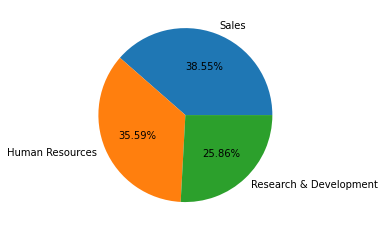

In [19]:
val=[0.3855,0.3559,0.2586]
label=['Sales','Human Resources','Research & Development']
plt.figure()
plt.pie(val, labels=label, autopct='%0.2f%%')
plt.show()

SALES DEPARTEMENT IS THE MOST ATTRITION DEPT

In [20]:
df.groupby('Business Travel')['Age'].agg(len).sort_values(ascending=False)

Business Travel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: Age, dtype: int64

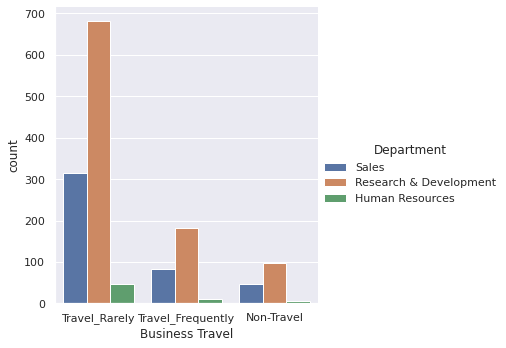

In [21]:
sb.set(rc={'figure.figsize':(18,10)})
plot=sb.catplot(x='Business Travel',hue='Department',kind='count',data=df)

MOST EMPLOYEES IN THE COMPANY RARELY TRAVELS



In [22]:
df.groupby('Education Field')['Yes'].agg(np.mean).sort_values(ascending=False)

Education Field
Human Resources     0.259259
Technical Degree    0.242424
Marketing           0.220126
Life Sciences       0.146865
Medical             0.135776
Other               0.134146
Name: Yes, dtype: float64

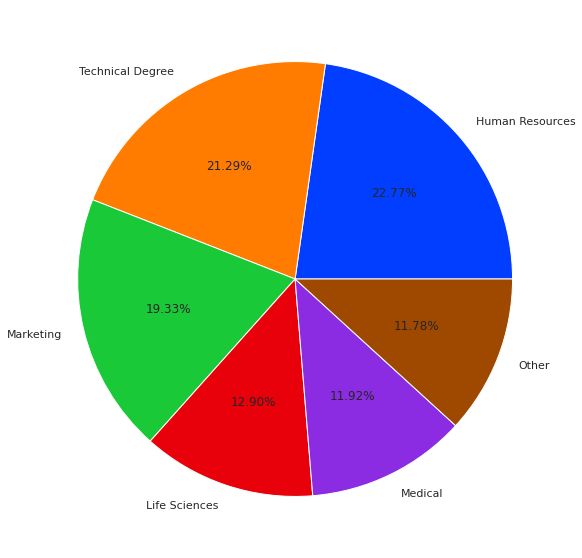

In [23]:
val=[0.259259,0.242424,0.220126,0.146865,0.135776,0.134146]
label=['Human Resources','Technical Degree','Marketing','Life Sciences','Medical','Other']
palette_color = sb.color_palette('bright')
plt.pie(val,labels=label,radius=1,colors=palette_color,autopct='%0.2f%%');

MOST ATTRITION EDUCATION FIELD IS HUMAN RESOURCES